In [8]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load California Housing data
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedianHouseValue')

# View data
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but helps in many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R²): {r2:.3f}")


Mean Absolute Error (MAE): 0.533
Mean Squared Error (MSE): 0.556
Root Mean Squared Error (RMSE): 0.746
R-squared (R²): 0.576


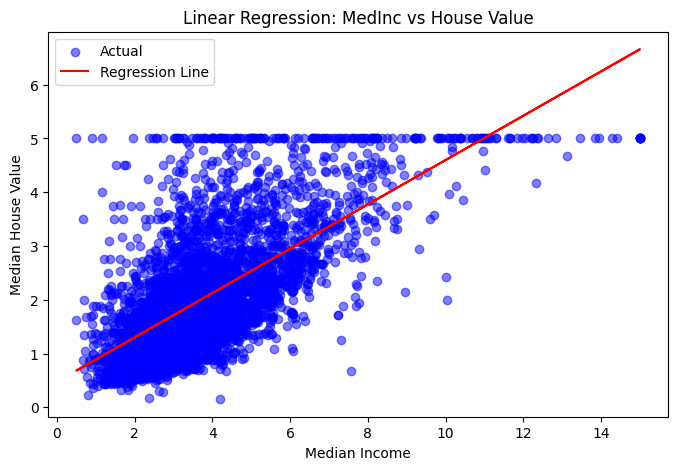

In [12]:
import matplotlib.pyplot as plt

# Plotting MedInc vs Target with predicted line
feature_idx = data.feature_names.index('MedInc')
X_medinc = X_test.iloc[:, feature_idx].values.reshape(-1, 1)
X_medinc_scaled = scaler.transform(X_test)[:, feature_idx].reshape(-1, 1)

# Create a new linear regression for single feature visualization
model_single = LinearRegression()
model_single.fit(X_medinc_scaled, y_test)

y_pred_line = model_single.predict(X_medinc_scaled)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_test['MedInc'], y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test['MedInc'], y_pred_line, color='red', label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression: MedInc vs House Value')
plt.legend()
plt.show()


In [13]:
# Print all coefficients
coefficients = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': model.coef_
})

print(coefficients.sort_values(by='Coefficient', ascending=False))


      Feature  Coefficient
0      MedInc     0.854383
3   AveBedrms     0.339259
1    HouseAge     0.122546
4  Population    -0.002308
5    AveOccup    -0.040829
2    AveRooms    -0.294410
7   Longitude    -0.869842
6    Latitude    -0.896929
